In [1]:
import pandas as pd
import numpy as np
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_pickle('../../data/preprocessed/merged/mergedX.pkl')
Y = pd.read_csv('../../data/preprocessed/merged/Y.csv')
Y = Y.merge(X, how='right', on='SEQN').drop(columns=[column for column in list(X.columns) if column != 'SEQN'])
Y = Y.drop(columns=['Unnamed: 0'])
Y = Y.applymap(lambda x: int(x))
Y

,SEQN,LungCancer,Retinopathy,LarynxCancer,KidneyCancer,HeartFailure,Jaundice,ChronicBronchitis,SkinCancerOther,EsophagealCancer,...,SinusInfection,Gonorrhea,Memory,BladderCancer,LeukemiaCancer,Dental Care,FractureWrist,LiverCondition,Melanoma,ProstateCancer
0,73564,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,73566,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,73600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,73607,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73613,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,73614,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,73615,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7,73616,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8,73621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,73622,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


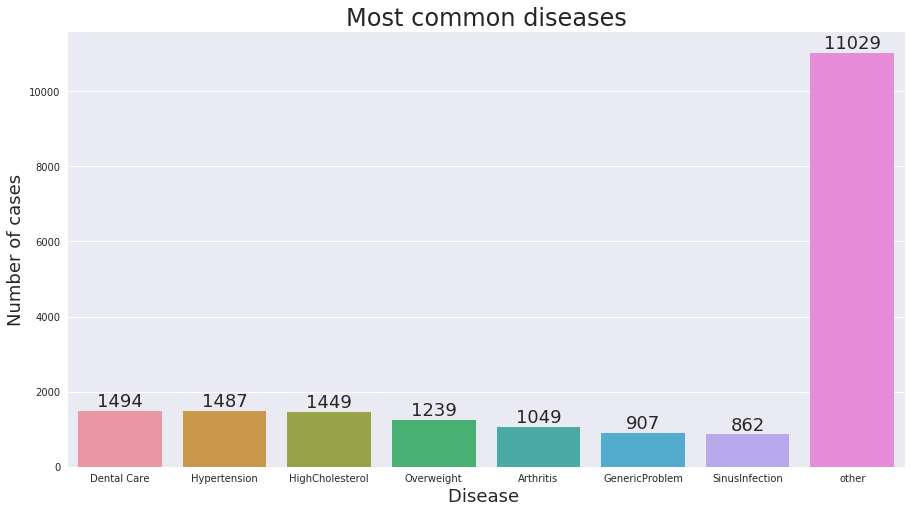

In [47]:
diseases = list(Y.columns.values)
diseases.remove('SEQN')
diseases

count = {}
for disease in diseases:
    count[disease] = Y[disease].sum()
sorted_count = sorted(count.items(), key=lambda kv: kv[1], reverse=True)

other_disease = sorted_count[7:]
other_disease_count = sum([count[1] for count in other_disease])

common_diseases = sorted_count[:7]
common_diseases.append(('other', other_disease_count))
common_diseases_name = [cd[0] for cd in common_diseases]
common_diseases_count = [cd[1] for cd in common_diseases]
# sorted_count[common_diseases]

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))
ax= sns.barplot(common_diseases_name, common_diseases_count)
plt.title("Most common diseases", fontsize=24)
plt.ylabel('Number of cases', fontsize=18)
plt.xlabel('Disease ', fontsize=18)
rects = ax.patches
labels = common_diseases_count
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

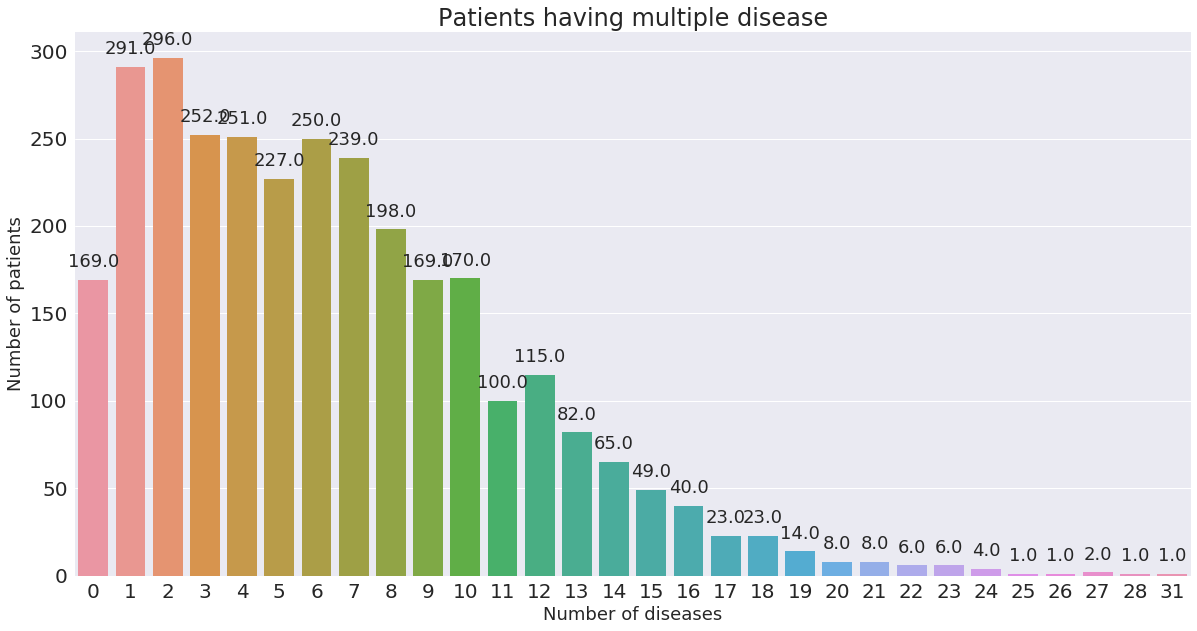

In [52]:
disease_sum = Y.iloc[:, 1:].sum(axis=1)
unique_disease_sum = list(set(disease_sum))
unique_disease_count = np.zeros(len(unique_disease_sum))
for patient_n_disease in disease_sum:
    idx = unique_disease_sum.index(patient_n_disease)
    unique_disease_count[idx] += 1
unique_disease_count
sns.set(font_scale = 2)
plt.figure(figsize=(20,10))
ax= sns.barplot(unique_disease_sum, unique_disease_count)
plt.title("Patients having multiple disease", fontsize=24)
plt.ylabel('Number of patients', fontsize=18)
plt.xlabel('Number of diseases', fontsize=18)
#adding the text labels
rects = ax.patches
labels = unique_disease_count
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

